<a href="https://colab.research.google.com/github/ecemisildar/ML_Project/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df=pd.read_csv('sensor_readings_24.csv', header=None)
headerList = ['S1','S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21' ,'S22', 'S23', 'S24','class']
df.to_csv("newsensor_readings_24.csv", header=headerList, index=False)
df2 = pd.read_csv("newsensor_readings_24.csv")

In [ ]:
df2.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S16,S17,S18,S19,S20,S21,S22,S23,S24,class
0,0.438,0.498,3.625,3.645,5.0,2.918,5.0,2.351,2.332,2.643,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,Slight-Right-Turn
1,0.438,0.498,3.625,3.648,5.0,2.918,5.0,2.637,2.332,2.649,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,Slight-Right-Turn
2,0.438,0.498,3.625,3.629,5.0,2.918,5.0,2.637,2.334,2.643,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,Slight-Right-Turn
3,0.437,0.501,3.625,3.626,5.0,2.918,5.0,2.353,2.334,2.642,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,Slight-Right-Turn
4,0.438,0.498,3.626,3.629,5.0,2.918,5.0,2.640,2.334,2.639,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,Slight-Right-Turn


In [ ]:
X=df2.drop(['class'],axis=1)
y=df2['class']

In [ ]:
num_features = X.shape[1]
print(f"Number of features: {num_features}")

Number of features: 24


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)##80:20 train:test ratio
lg_model = LogisticRegression()
lg_model.fit(X_train,y_train)
y_predict = lg_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('Accuracy:',accuracy_score(y_test,y_predict))
print('Classification Report')
print(classification_report(y_test,y_predict))

Accuracy: 0.8864468864468864
Classification Report                    precision    recall  f1-score   support

     Move-Forward       0.87      0.87      0.87       443
 Sharp-Right-Turn       0.90      0.95      0.93       423
 Slight-Left-Turn       0.95      0.88      0.91        60
Slight-Right-Turn       0.88      0.77      0.82       166

         accuracy                           0.89      1092
        macro avg       0.90      0.87      0.88      1092
     weighted avg       0.89      0.89      0.89      1092



In [ ]:
tree_model=DecisionTreeClassifier(criterion="entropy")
tree_model.fit(X_train,y_train)
tree_prediction=tree_model.predict(X_test)

print('Accuracy:',accuracy_score(y_test,y_predict))
print('Classification Report')
print(classification_report(y_test,y_predict))

Accuracy: 0.9935897435897436
Classification Report                    precision    recall  f1-score   support

     Move-Forward       1.00      0.99      0.99       443
 Sharp-Right-Turn       0.99      1.00      0.99       423
 Slight-Left-Turn       1.00      0.98      0.99        60
Slight-Right-Turn       0.99      0.99      0.99       166

         accuracy                           0.99      1092
        macro avg       0.99      0.99      0.99      1092
     weighted avg       0.99      0.99      0.99      1092



In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)
y_predict = svm_model.predict(X_test)

print('Accuracy:',accuracy_score(y_test,y_predict))
print('Classification Report')
print(classification_report(y_test,y_predict))

Accuracy: 0.8864468864468864
Classification Report
                   precision    recall  f1-score   support

     Move-Forward       0.87      0.87      0.87       443
 Sharp-Right-Turn       0.90      0.95      0.93       423
 Slight-Left-Turn       0.95      0.88      0.91        60
Slight-Right-Turn       0.88      0.77      0.82       166

         accuracy                           0.89      1092
        macro avg       0.90      0.87      0.88      1092
     weighted avg       0.89      0.89      0.89      1092



# **LEARNED POSE ESTIMATION**




In [1]:
!pip install kaggle

In [5]:
from google.colab import files

# Upload the Kaggle API key file (kaggle.json)
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [6]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [7]:
!kaggle datasets download -d louisburtz/learned-pose-estimation-robot-on-the-moon

100% 19.0G/19.0G [03:19<00:00, 135MB/s]
100% 19.0G/19.0G [03:19<00:00, 102MB/s]


In [8]:
!pip install -qq neptune-client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 8.2 MB/s eta 0:00:00


In [43]:
!git clone https://github.com/TeamL3/learned-pose-estimation.git

fatal: destination path 'learned-pose-estimation' already exists and is not an empty directory.


In [50]:
import sys
sys.path.insert(0, '/content/learned-pose-estimation/src/architectures/')
import numpy as np
import ml_utils
import pose_utils
from pose_utils import DEG_TO_RAD
from pose_utils import RAD_TO_SCALED
from pose_utils import METERS_TO_SCALED

In [63]:
import zipfile
import os
!mkdir /content/dataset

# Specify the zip file name
zip_file_name = '/content/learned-pose-estimation-robot-on-the-moon.zip'

# Specify the destination directory for extracting the contents
destination_directory = '/content/dataset'

# Path to the zip file
zip_file_path = os.path.join(destination_directory, zip_file_name)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_directory)




In [61]:
kaggle_data_path = '/content/dataset/learned-pose-estimation-robot-on-the-moon/'

### Choose any dataset you want to work with by uncomenting that one line:

# tf_data_path = kaggle_data_path + 'all_around_zones_3500_tf_data'
# tf_data_path = kaggle_data_path + 'all_around_scout_4501_tf_data'
# tf_data_path = kaggle_data_path + 'face_to_face_zones_2500_tf_data'
tf_data_path = kaggle_data_path + 'hopper_4500_tf_data'
# tf_data_path = kaggle_data_path + 't_formation_zones_3500_tf_data'

### Each dataset shows images of a different target object:
target = pose_utils.which_target(tf_data_path)
target
tf_data_path

'/content/learned-pose-estimation-robot-on-the-moon/hopper_4500_tf_data'

In [77]:
# ds_split = 'train'   # 70%
# ds_split = 'val'     # 20%
ds_split = 'test'      # 10%
import tensorflow as tf


ds = ml_utils.load_dataset('/content/dataset/hopper_4500_tf_data_test', compression='GZIP')
ds

<_LoadDataset element_spec=(TensorSpec(shape=(480, 640, 4), dtype=tf.float32, name=None), TensorSpec(shape=(3,), dtype=tf.float32, name=None))>

img shape: (480, 640, 4), found 4 channels
raw:   d = 0.413 , theta = -0.157    , yaw = 0.093 
human: d = 10.32 m, theta = -28.3 deg, yaw = 16.7 deg
img shape: (480, 640, 4), found 4 channels
raw:   d = 0.375 , theta = -0.562    , yaw = 0.056 
human: d = 9.37 m, theta = -101.2 deg, yaw = 10.1 deg
img shape: (480, 640, 4), found 4 channels
raw:   d = 0.460 , theta = -0.892    , yaw = 0.061 
human: d = 11.50 m, theta = -160.5 deg, yaw = 11.0 deg


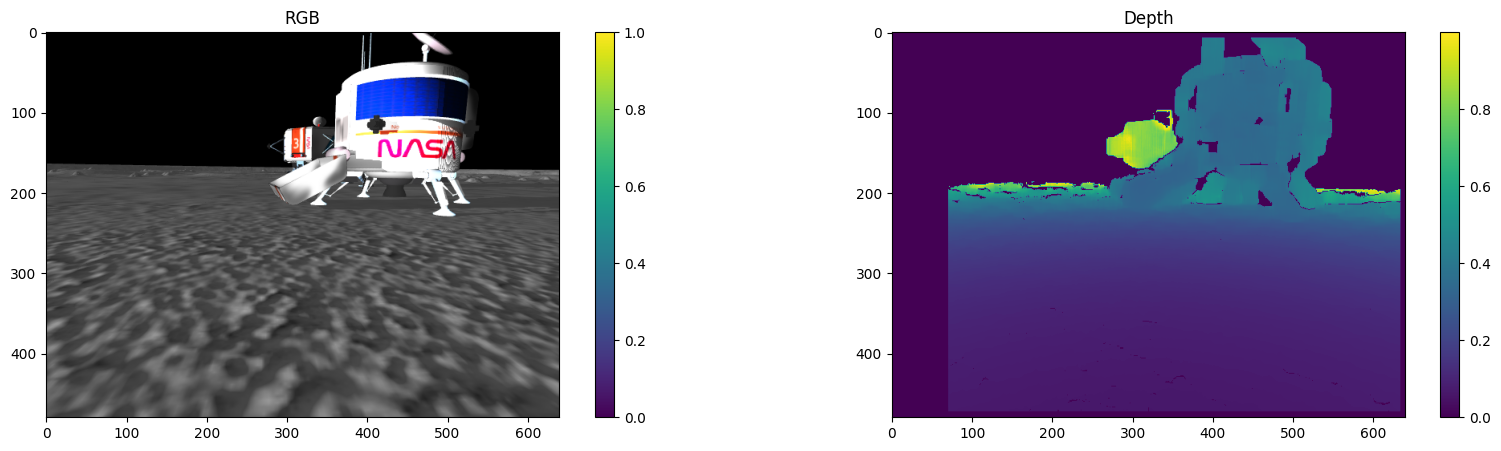

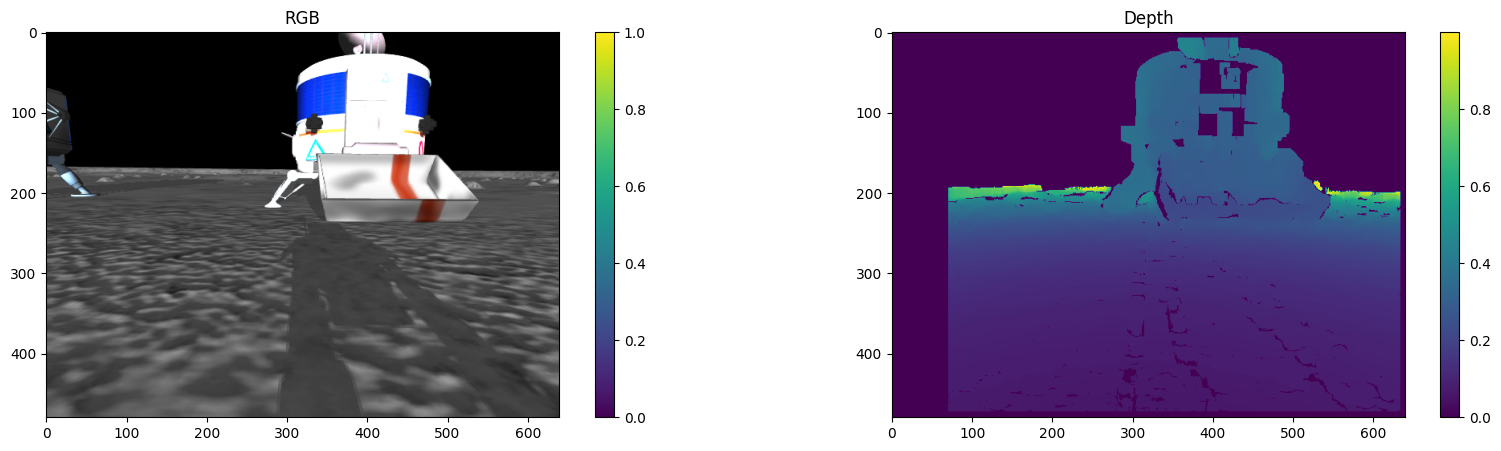

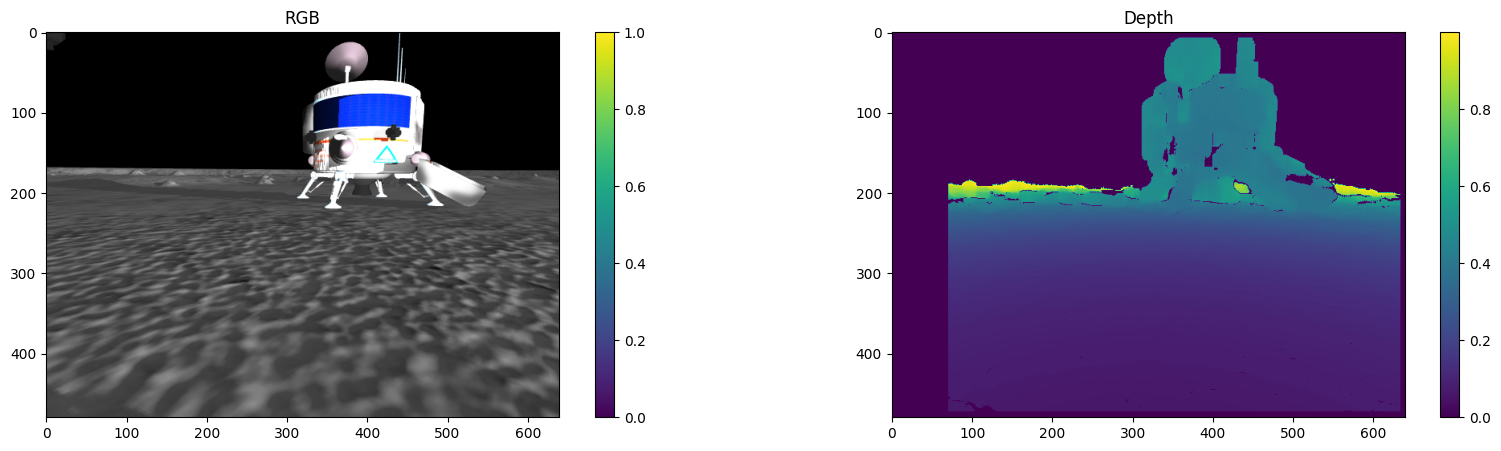

In [78]:
for image, label in ds.skip(6).take(3):
    pose_utils.show_rgbd(image, format='rgbd')
    d, theta, yaw = label.numpy()
    print(f"raw:   d = {d:.3f} , theta = {theta:.3f}    , yaw = {yaw:.3f} ")
    print(f"human: d = {d / METERS_TO_SCALED:.2f} m, theta = {theta / RAD_TO_SCALED / DEG_TO_RAD:.1f} deg, yaw = {yaw / RAD_TO_SCALED / DEG_TO_RAD:.1f} deg")

In [74]:
# load entire dataset *labels* into memory (discard images)
labels = np.array([label.numpy() for _, label in ds])
labels.shape

(417, 3)

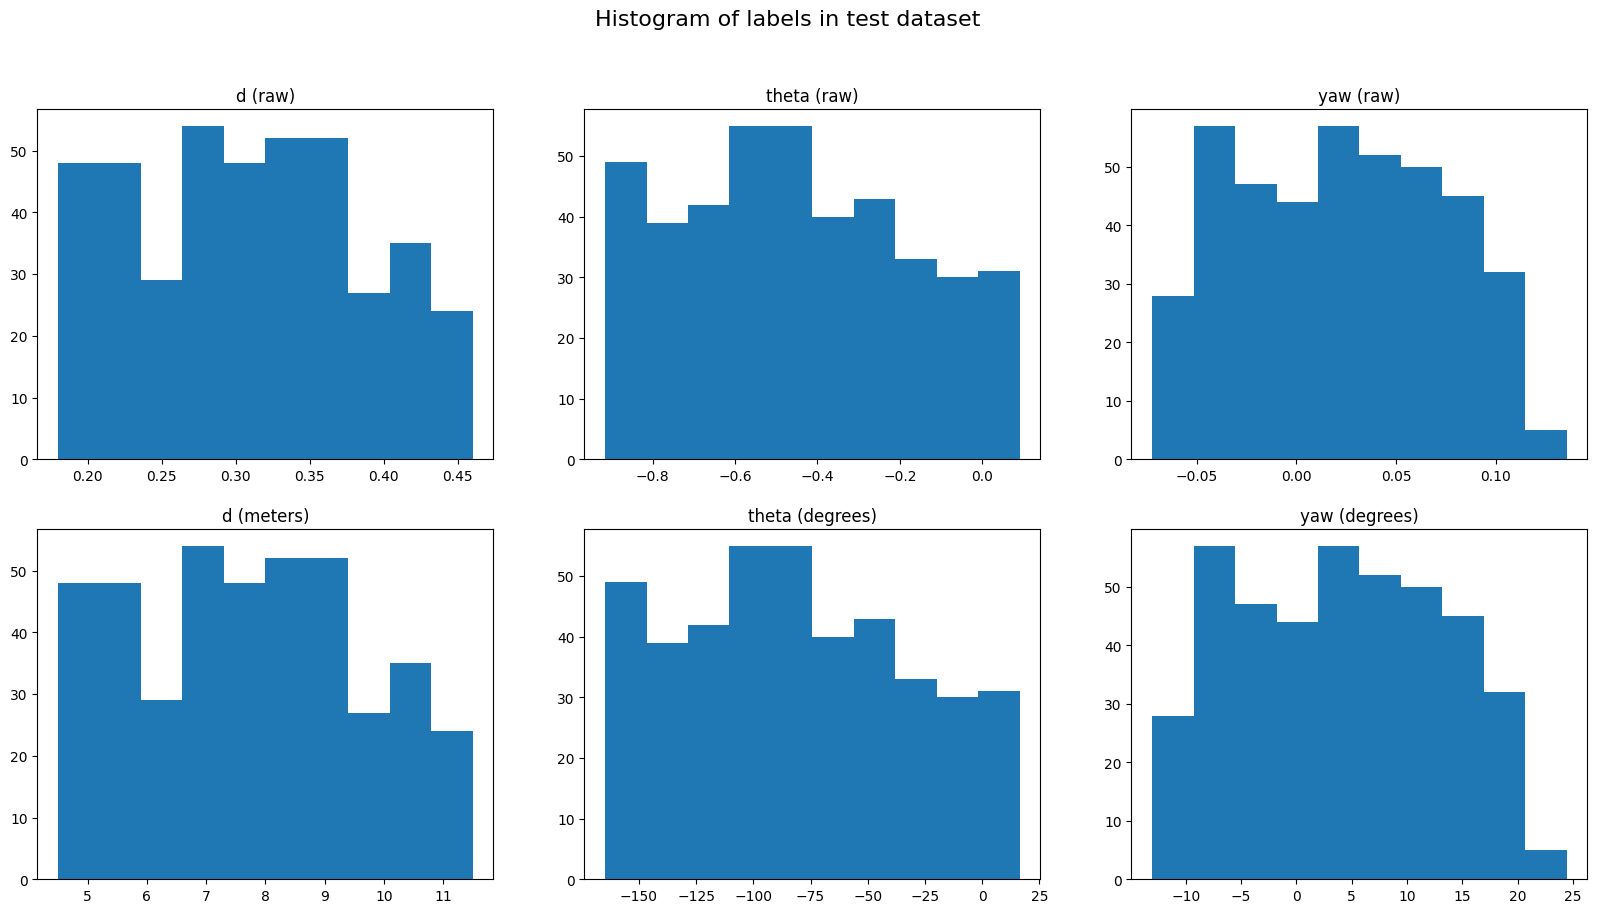

In [75]:
pose_utils.hist_labels(
    labels,
    title=f'Histogram of labels in {ds_split} dataset'
);

In [76]:
pose_utils.subplot_labels(
    labels,
    viz='raw',
    title='plot of labels for entire dataset',
    subset=None
)

In [79]:
pose_utils.subplot_labels(
    labels,
    viz='human',
    title='subset of labels scaled to human readable units',
    subset=100
)

In [80]:
d_true = labels[:, 0] / METERS_TO_SCALED
theta_true = labels[:, 1] / RAD_TO_SCALED
yaw_true = labels[:, 2] / RAD_TO_SCALED

pose_utils.plot_optical_poses(
    d_true, theta_true, yaw_true,
    title=f"top view of poses in {ds_split} dataset",
    subset=None,
    footprint=target
)

In [81]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [82]:
ds_train = ml_utils.load_dataset('/content/dataset/hopper_4500_tf_data_train', compression='GZIP')
ds_val = ml_utils.load_dataset('/content/dataset/hopper_4500_tf_data_val', compression='GZIP')
ds_test = ml_utils.load_dataset('/content/dataset/hopper_4500_tf_data_test', compression='GZIP')

In [85]:
def make_basic_model(input_shape, height, width, n_outputs, pool_size):

    model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.experimental.preprocessing.Resizing(height, width),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=pool_size),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=pool_size),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=pool_size),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=pool_size),
        layers.Flatten(),

        layers.Dense(6, activation="relu"),
        layers.Dense(24, activation="relu"),
        layers.Dense(24, activation="relu"),
        layers.Dropout(0.1),
        layers.Dense(n_outputs, activation="linear"),
    ]
)
    return model

In [86]:
model = make_basic_model(
    (480, 640, 4),
    120, 160,
    n_outputs=3,
    pool_size=2
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 120, 160, 4)       0         
                                                                 
 conv2d (Conv2D)             (None, 120, 160, 32)      1184      
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 160, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 60, 80, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 80, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 80, 64)        36928     
                                                        

In [87]:
alpha = 0.1
beta = 0.03
batch_size = 32

ds_train_b = ds_train.batch(batch_size, drop_remainder=True)
ds_val_b = ds_val.batch(batch_size, drop_remainder=True)
ds_test_b = ds_test.batch(batch_size, drop_remainder=True)

## use cache for 5x training speedup and because dataset is small enough (~10GB) to fit on disk
## note: during training, it is safe to ignore the four warnings "The calling iterator did not fully read the dataset being cached."
# buffer_size = tf.data.experimental.AUTOTUNE  # the prefetch buffer size is dynamically tuned
# ds_train_b = ds_train.cache('/kaggle/tmp/cache_train').batch(batch_size, drop_remainder=True).prefetch(buffer_size)
# ds_val_b = ds_val.cache('/kaggle/tmp/cache_val').batch(batch_size, drop_remainder=True).prefetch(buffer_size)
# ds_test_b = ds_test.batch(batch_size, drop_remainder=True).prefetch(buffer_size)

def pose_loss(y_true, y_pred):
    pose_loss = \
        ml_utils.distance_loss(y_true, y_pred) +  \
        alpha * ml_utils.theta_loss(y_true, y_pred) + \
        beta * ml_utils.orientation_loss(y_true, y_pred)
    return pose_loss

def theta_loss(y_true, y_pred):
    return alpha * ml_utils.theta_loss(y_true, y_pred)

def orientation_loss(y_true, y_pred):
    return beta * ml_utils.orientation_loss(y_true, y_pred)

model.compile(
    loss=pose_loss,
    optimizer='adam',
    metrics=[
        ml_utils.distance_loss,     # intermediate loss, for tuning alpha and beta
        theta_loss,                 # intermediate loss, for tuning alpha and beta
        orientation_loss,           # intermediate loss, for tuning alpha and beta
        ml_utils.distance_diff,     # intermediate errors: human understandable
        ml_utils.theta_diff,        # intermediate errors: human understandable
        ml_utils.orientation_diff,  # intermediate errors: human understandable
    ]
)

In [88]:
callbacks = [
    keras.callbacks.ReduceLROnPlateau(),
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        mode='min',
        patience=4,
        verbose=1,
        restore_best_weights=True
    )
]

In [89]:
history = model.fit(
    ds_train_b,
    epochs=100,
    validation_data=ds_val_b,
    callbacks=callbacks,
)

Epoch 1/100
32/90 [=========>....................] - ETA: 4:43 - loss: 0.0676 - distance_loss: 0.0438 - theta_loss: 0.0235 - orientation_loss: 1.9900e-04 - distance_diff: 4.3620 - theta_diff: 73.9015 - orientation_diff: 11.6000

KeyboardInterrupt: ignored